In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


# **In this notebook I will seek to implement Linear Regression using three approaches. 
# i) Using gradient descent from scratch
# ii) Using the analytical approach(Ordinary least Squares) from scratch
# iii) Using scikit-learn's linear models**

In [2]:
df = pd.read_csv(r'/kaggle/input/random-linear-regression/train.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
#Checking for null values in the dataset
df.isnull().sum()

x    0
y    1
dtype: int64

In [4]:
#Drop the row with the null values
df = df.dropna()
df.isnull().sum()


x    0
y    0
dtype: int64

**Approach i) Implementing linear regression using gradient descent**
In this approach, the model's parameters are updated using the Widrow-Hoff learning rule

In [5]:
#creating a class for gradient-descent linear regression
class gradientLinearRegression(object):
    def __init__(self, threshold=1e-5, learningRate =1e-6,theta = np.zeros(2)):
        """Parameters:
            threshold(float): to evaluate convergence of the weight parameters
            learning_rate(float): step size of updates to the weight parameter
            theta(np.array): Initial array of weight parameters"""
        self.threshold = threshold
        self.learningRate = learningRate #the learningRate was arrived at by trial and error, beginning at 1e-2 and dividing by a factor of 10 each time
        self.theta = theta
        
    def fit(self,X,y):
        """Creating a model that will fit the given dataset
            Parameters:
            X(np.array): (n,d)-dimensional data matrix
            y(np.array): n-dimensional vector of actual targets
            
            Return:
            theta(np.array): d+1-dimensional vector of optimized parameters to fit the model to the dataset"""
        X=np.array(X)
        y=np.array(y).reshape(y.shape[0])
        X=np.hstack([X,np.ones((X.shape[0],1))]) #adding a column of ones to cater for the zeroth dimension in theta
        self.theta = np.random.normal(loc=0.0, scale=0.1, size = X.shape[1])#initialization of the weight parameter
        thetaPrev = np.ones((X.shape[1]))
        mses=[]#array storing the mean square error after each iteration
        while np.linalg.norm((self.theta - thetaPrev))> self.threshold:
            predicted_y = X.dot(self.theta)
            thetaPrev = self.theta
            differences = predicted_y - y
            mses.append(0.5*(np.mean(differences**2))) #How the mean square error is calculated
            gradientVector = np.mean(differences*X.T,axis=1) #vector containing the partial derivatives of the MSE cost function with respect to the weight parameters
            #widrow-hoff update
            self.theta=thetaPrev - self.learningRate * gradientVector
        return self.theta
    
    def predict(self,X):
        """Using the optimized model to predict values for a certain dataset
            Parameters:
            X(np.array): (n,d)-dimensional data matrix
            
            Return:
            predictions(np.array): n-dimensional vector of predicted targets"""
        X=np.array(X)
        X=np.hstack([X,np.ones((X.shape[0],1))])
        predictions = X.dot(self.theta)
        return predictions



**Approach ii): Implementing linear regression using Ordinary Least Squares**
This approach leverages linear algebra to find the optimal weight parameters in one step via the normal equations.

In [6]:
#Creating a class for ordinary least squares linear regression
class olsLinearRegression(object):
    def __init__(self,theta=np.zeros(2)):
        """Parameters:
            theta(np.array): Initial array of weight parameters"""
        self.theta = theta
        
    def fit(self, X, y):
        """Creating a model that will fit the given dataset
            Parameters:
            X(np.array): (n,d)-dimensional data matrix
            y(np.array): n-dimensional vector of the actual target values
            
            Return:
            theta(np.array): d+1-dimensional vector of the optimal weight parameters"""
        X=np.array(X)
        y=np.array(y).reshape(y.shape[0])
        X=np.hstack([X, np.ones((X.shape[0],1))])
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
        return self.theta
    
    def predict(self, X):
        """Using the optimized model to predict targets for a certain dataset
            Parameters:
            X(np.array): (n,d)-dimensional data matrix
            
            Return:
            predictions(np.array): n-dimensional vector of predicted targets"""
        X = np.array(X)
        X=np.hstack([X,np.ones((X.shape[0],1))])
        predictions = X.dot(self.theta)
        return predictions

Now we can implement these versions of simple univariate linear regression and compare their performance with that of the scikit-learn library


In [7]:
from sklearn import linear_model
from sklearn.metrics  import mean_squared_error
from sklearn.model_selection import train_test_split

#Converting the dataframe's columns into separate dataframes
X=df[['x']]
y=df[['y']]

#Performing the train-test spit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

#Initializing the different models
sklearnModel = linear_model.LinearRegression()
olsModel = olsLinearRegression()
gradientDescentModel = gradientLinearRegression()

#Fitting the different models to the training data set
sklearnModel.fit(X_train, y_train)
olsModel.fit(X_train, y_train)
gradientDescentModel.fit(X_train, y_train)

#Generating predictions on the test data
sklearnTestPredictions = sklearnModel.predict(X_test)
olsTestPredictions = olsModel.predict(X_test)
gradientTestPredictions = gradientDescentModel.predict(X_test)

#Evaluating the mean squared error from all three models
sklearnMSE = mean_squared_error(y_test, sklearnTestPredictions)
olsMSE = mean_squared_error(y_test, olsTestPredictions)
gradientMSE = mean_squared_error(y_test, gradientTestPredictions)

print(f'Scikit-learn MSE: {sklearnMSE}')
print(f'Ordinary Least Squares MSE: {olsMSE}')
print(f'Gradient Descent MSE: {gradientMSE}')


Scikit-learn MSE: 7.054753631948809
Ordinary Least Squares MSE: 7.054753631948772
Gradient Descent MSE: 7.189971714227707


All three models have about the same MSE with the one produced by the gradient descent approach being slightly higher due to the threshold specification.

Applying the model onto the test csv and plotting the results


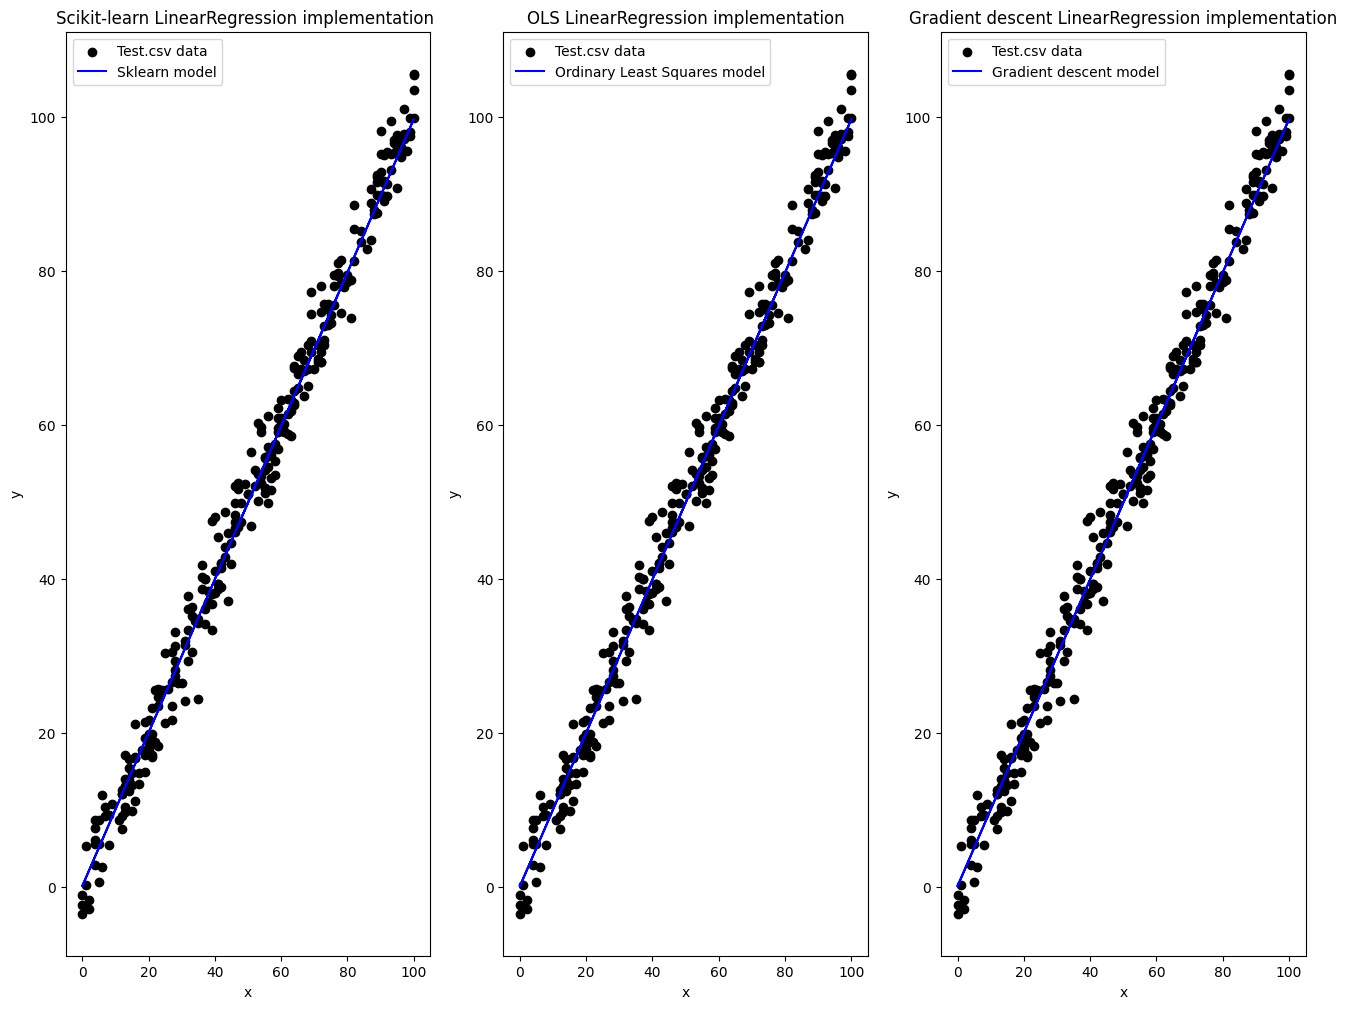

In [8]:
testdf = pd.read_csv(r'/kaggle/input/random-linear-regression/test.csv')
testdf.head()
testX = testdf[['x']]

sklearnTestY = sklearnModel.predict(testX)
olsTestY = olsModel.predict(testX)
gradientTestY = gradientDescentModel.predict(testX)

#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize = (16,12))

plt.subplot(1,3,1)
plt.scatter(testX, testdf[['y']],color = 'black',label='Test.csv data')
plt.plot(testX,sklearnTestY, color = 'blue', label = 'Sklearn model')
plt.title('Scikit-learn LinearRegression implementation ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(testX, testdf[['y']],color = 'black',label='Test.csv data')
plt.plot(testX,olsTestY, color = 'blue', label = 'Ordinary Least Squares model')
plt.title('OLS LinearRegression implementation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(testX, testdf[['y']],color = 'black',label='Test.csv data')
plt.plot(testX,sklearnTestY, color = 'blue', label = 'Gradient descent model')
plt.title('Gradient descent LinearRegression implementation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()